In [2]:
#Для работы с данными
import numpy as np
import pandas as pd
#Для реализации k-mean
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#Для визуализации
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
trans_set=pd.read_csv('german_credit.csv', sep=',',header=0)
Data=trans_set.values

In [4]:
x = Data[:,2]
y = Data[:,13]
z = Data[:,20]

In [5]:
def scatter3d(x,y,z,c):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y,z,c=c)
    ax.set_title('Loans in Germany')
    ax.set_xlabel('Length of credit (months)')
    ax.set_ylabel('Age (years)')
    ax.set_zlabel('Foreigner (no/yes)')
    plt.show()

In [6]:
print(type(x))

<class 'numpy.ndarray'>


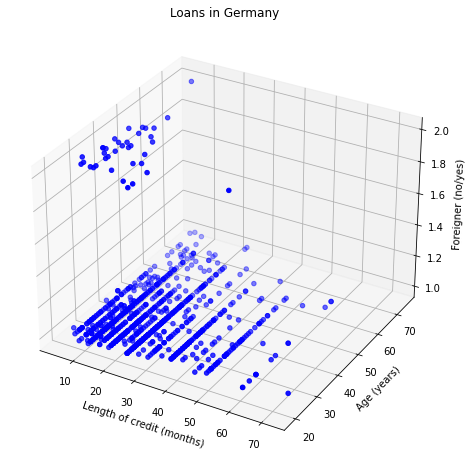

In [7]:
scatter3d(x,y,z,'blue')

In [8]:
Clients = Data
Clients = np.delete(Clients, np.s_[0:2], axis=1)
Clients = np.delete(Clients, np.s_[1:11], axis=1)
Clients = np.delete(Clients, np.s_[2:8], axis=1)

In [9]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(Clients)
portraits = kmeans.cluster_centers_

In [10]:
for x in range (5):
    if(round(portraits[x][2])==1):
        resident = 'Citizen '
    else:
        resident ='Visitor '
    months = int(round(portraits[x][0]))
    years = round((months/12),1)
    print(resident+'at the age of '+ str(int(round(portraits[x][1])))+' years and a term loan '+str(months)+'months ('+str(years)+' years).')

Citizen at the age of 29 years and a term loan 27months (2.2 years).
Citizen at the age of 41 years and a term loan 14months (1.2 years).
Citizen at the age of 59 years and a term loan 18months (1.5 years).
Citizen at the age of 37 years and a term loan 45months (3.8 years).
Citizen at the age of 27 years and a term loan 13months (1.1 years).


In [12]:
labels = kmeans.labels_

In [13]:
color = list(range(len(Data)))

for x in range(len(Data)):
    if labels[x] == 0:
        color[x]= 'red'
    elif labels[x]== 1:
        color[x] ='yellow'
    elif labels[x] == 2:
        color[x] ='green'
    elif labels[x] == 3:
        color[x] ='blue'
    else:
        color[x]='black'

In [14]:
x = Clients[:,0]
y = Clients[:,1]
z = Clients[:,2]

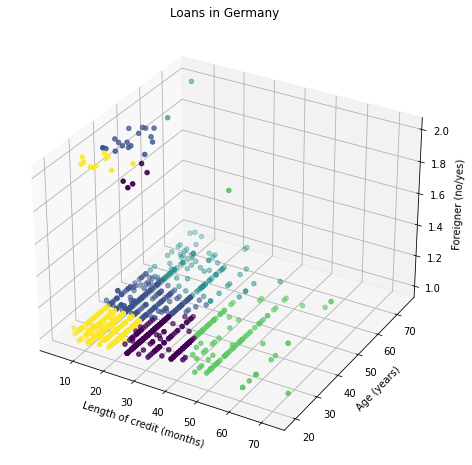

In [15]:
scatter3d(x,y,z,c=labels)

In [22]:
for n_cluster in range(2, 16):
    kmeans = KMeans(n_clusters=n_cluster).fit(Clients)
    label = kmeans.labels_
    sil_coeff = silhouette_score(Clients, label, metric='euclidean')
    print("Для {} кластеров, коэффициент функции силуэта {}.".format(n_cluster, round(sil_coeff,3)))

Для 2 кластеров, коэффициент функции силуэта 0.422.
Для 3 кластеров, коэффициент функции силуэта 0.446.
Для 4 кластеров, коэффициент функции силуэта 0.365.
Для 5 кластеров, коэффициент функции силуэта 0.363.
Для 6 кластеров, коэффициент функции силуэта 0.376.
Для 7 кластеров, коэффициент функции силуэта 0.387.
Для 8 кластеров, коэффициент функции силуэта 0.392.
Для 9 кластеров, коэффициент функции силуэта 0.39.
Для 10 кластеров, коэффициент функции силуэта 0.394.
Для 11 кластеров, коэффициент функции силуэта 0.402.
Для 12 кластеров, коэффициент функции силуэта 0.401.
Для 13 кластеров, коэффициент функции силуэта 0.406.
Для 14 кластеров, коэффициент функции силуэта 0.39.
Для 15 кластеров, коэффициент функции силуэта 0.377.
